## Note

- Author: Luke Arunanondchai
- Software: Python 3.7.3, 64-bit
- Project: ARM

### Steps
1. In the text-preprocessing step, stopwords and unwanted characters are removed. 
2. TFIDF matrix is computed for 1- to 6-gram features corresponding to each tokenized sentences.
3. DBSCAN is performed on the TFIDF matrix. The unique sentences are then separated and go through step 1-3 again in order to generate new sets of featurs before running DBSCAN. The algorithm stops when DBSCAN can no longer reduce the number of unique sentences.
4. Once we have all sentences assigned into groups, we generate a sentence-group-count matrix for all KAM reports. In this matrix, sentence groups serve as features of each KAM report.
5. Then, we perform DBSCAN on the sentence-group-count matrix to classify each KAM report into groups.

### Outputs
1. Report by sentence
2. Report by document
3. QC Report using cosine score
4. QC Histogram using cosine score
5. QC Report using DBSCAN
6. Summary Table by Filter


### Import the customized package and other external packages

In [1]:
# Import packages 
from KAM_project_4.kam_classification_tools import *
import sklearn
%matplotlib inline 
%matplotlib qt

### Housekeeping Step

In [2]:
# Housekeeping : delete all python objects before starting
for f in glob.glob('..\\Intermediates\\*'):
    os.remove(f)

### Note for the input file
Please refer to the memo.

In [3]:
excel_file = "UK KAM data with correct std classifications.xlsx"
es_sent = [0.99] ; es_kam = [1.0]

# Choose KAM Item
# my_item = 'kam_description'
my_item = 'kam_addressing'


## KAM Classification Steps

### Perfrom text preprocessing steps and generate the initial output from the 1st step of DBSCAN.

In [4]:
print(transform_and_train.__doc__)


	
	Description for the `transform_and_train` function:
	Inputs:
		file            : xlsx filename.
		my_item         : kam item. Currently, it is either kam_description or kam_addressing.
		e               : The maximum distance between two samples for one to be considered as in the 
                                neighborhood of the other. This is the most important DBSCAN parameter to 
                                choose appropriately for your data set and distance function.
		my_year         : year (int). The default value is ''.
		min_s	        : The number of samples in a neighborhood for a point to be considered 
				as a core point for DBSCAN. The default value is 2.
		length_feature 	: A boolean parameter to specify whether the length of sentences should be 
                                used as a feature or not. The default value is False.
                output          : default = False, export an xlsx file to the Ouputs directory if True.
    
	Outputs:
		df_sent    

In [5]:
for e in es_sent:
    df_sent = transform_and_train(file = excel_file, my_item = my_item, e = e, music=False)

Text Preprocessing...
Training...


Done


### Perform sequential DBSCAN with decreasing n-gram.

In [6]:
print(seqNoisesClassfication.__doc__)


	Description for the `seqNoisesClassfication` function:
	Inputs:
		e               : The maximum distance between two samples for one to be considered as in the 
                                neighborhood of the other. This is the most important DBSCAN parameter to 
                                choose appropriately for your data set and distance function.
		my_item         : kam item. Currently, it is either kam_description or kam_addressing.
		df              : The dataframe from the `transform_and_train` function.
		my_gram	        : n-gram to be used for the analysis. default = (1,6). 
		out_path        : The directory path for the multi-DBSCAN step's outputs.
                length_feature  : A boolean parameter to specify whether the length of sentences should be 
                                used as a feature or not. The default value is False.
                output          : default = False, export an xlsx file to the Ouputs directory if True.
    
	Outputs:
		df_sent

In [7]:
df_sent_final = seqNoisesClassfication(es_sent[-1],my_item,df_sent,      my_gram = (1,6))
df_sent_final = seqNoisesClassfication(es_sent[-1],my_item,df_sent_final,my_gram = (1,5))
df_sent_final = seqNoisesClassfication(es_sent[-1],my_item,df_sent_final,my_gram = (1,4))
df_sent_final = seqNoisesClassfication(es_sent[-1],my_item,df_sent_final,my_gram = (1,3))
df_sent_final = seqNoisesClassfication(es_sent[-1],my_item,df_sent_final,my_gram = (1,2))
df_sent_final = seqNoisesClassfication(es_sent[-1],my_item,df_sent_final,my_gram = (1,1))


Iterations corresponding to n-gram = (1, 6)
Number of iterations needed: 3
Number of sentences in the noise group in each iteration: [5810, 5763, 5761]
-----------------------------------------------------------------------------------

Iterations corresponding to n-gram = (1, 5)
Number of iterations needed: 3
Number of sentences in the noise group in each iteration: [5761, 5632, 5630]
-----------------------------------------------------------------------------------

Iterations corresponding to n-gram = (1, 4)
Number of iterations needed: 3
Number of sentences in the noise group in each iteration: [5630, 5479, 5477]
-----------------------------------------------------------------------------------

Iterations corresponding to n-gram = (1, 3)
Number of iterations needed: 3
Number of sentences in the noise group in each iteration: [5477, 5310, 5308]
-----------------------------------------------------------------------------------

Iterations corresponding to n-gram = (1, 2)
Number 

### Perform DBSCAN for KAM reports.

In [8]:
print(kamClassifcation.__doc__)


	Description for the `kamClassifcation` function:
	Inputs:
		df              : The dataframe from the `seqNoisesClassfication` function.
		my_item         : kam item. Currently, it is either kam_description or kam_addressing.
		file            : xlsx filename.
		my_gram	        : n-gram to be used for the analysis. default = (1,6).
                es              : A list of epsilon values.  
		out_path        : The directory path for the kam_report DBSCAN step's output.
                output          : default = False, export an xlsx file to the Ouputs directory if True.
    
	Outputs:
		final_kam_group : The output from the kam_report DBSCAN step.
                label_df        : The labels from the kam_report DBSCAN step.
	
	


In [9]:
final_kam_group, label_df, orig = kamClassifcation(df_sent_final,my_item,excel_file ,es_kam,output=True)


Output Filename:  kam_addressing_report_1.0_1582.xlsx


## QC Process

### Perform QC by DBSCAN

In [10]:
print(QC_uniqueSentences_DB.__doc__)


	Description for the `QC_uniqueSentences_DB` function:
	Inputs:
            df_sent_final       : The dataframe from the `seqNoisesClassfication` function.
	    my_item             : kam item. Currently, it is either kam_description or kam_addressing.
            by_chunk            : default = True = QC by chunk. QC by sentence if False.
            output              : default = False, export an xlsx file to the Ouputs directory if True.
    
	Outputs:
	    df_check                : A QC report.
	
	


In [11]:
# Perfom QC by DBSCAN for all unique sentences
QC_DB_df_chunk = QC_uniqueSentences_DB(df_sent_final,my_item,by_chunk=True,output=False)

## Perfom QC by DBSCAN for unique sentences one by one
# QC_DB_df_sent = QC_uniqueSentences_DB(df_sent_final,my_item,by_chunk=False,output=False)

Number of unique sentences got regrouped : 0


Here, we ran DBSCAN on the unique sentences with previously grouped sentences. The result (0) from the QC step ensures that no more regrouping is possible.

### Perform QC by cosine similarity score.

Note: Since there is a limitation on the number of rows in excel, we create the condition that we will keep only the pairs of sentences that have their cosine similarity scores greater than 0.1.


	Description for the `QC_uniqueSentences_cosine` function:
	Inputs:
            df_sent_final   : The dataframe from the `seqNoisesClassfication` function.
	    my_item         : kam item. Currently, it is either kam_description or kam_addressing.
            min_cosine      : The minimum value of cosine score to be considered. default = 0.1.
            output          : default = False, export an xlsx file to the Ouputs directory if True.
            my_col          : color for the histogram. default = 'maroon'
    
	Outputs:
	    matched_sent        : A QC report.
            histogram
	
	
Maximum value of Cosine Similarity Score: 0.4843412154884688

Output Filename:  kam_addressing_QC_uniqueSentences_cosine.xlsx


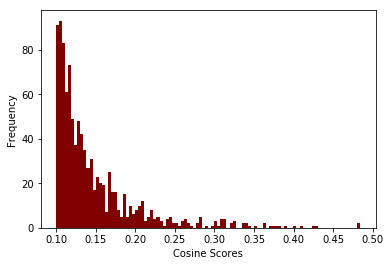

In [12]:
print(QC_uniqueSentences_cosine.__doc__)
QC_cosine = QC_uniqueSentences_cosine(df_sent_final,my_item,min_cosine = 0.1,output=True, my_col = 'maroon')

## Summary Tables

In [13]:
print(genSummaryTable.__doc__)


	Description for the `genSummaryTable` function:
	Inputs:
	    my_item             : kam item. Currently, it is either kam_description or kam_addressing.
            df_sent_final       : The dataframe from the `seqNoisesClassfication` function.
            final_kam_group     : The output from the kam_report DBSCAN step.
            group_filer         : A list of filtered groups. default = ['year']
            output              : default = False, export an xlsx file to the Ouputs directory if True.
    
	Outputs:
	    sd_tb               : A summary table.
	
	


In [14]:
genSummaryTable(my_item,df_sent_final,final_kam_group,output=True)


Output Filename:  kam_addressing_SummaryTable_year.xlsx


Total  Percent
Item           Filter Type                          
kam_addressing 2013   KAM component   735.0    39.11
                      sentence       2350.0    69.02
               2014   KAM component  1233.0    33.92
                      sentence       5243.0    58.10
               2015   KAM component   451.0    29.40
                      sentence       2383.0    53.08
               ALL    KAM component  2419.0    34.60
                      sentence       9976.0    59.47

In this table, the Total column reports the number of sentences or KAM components that are grouped by the algorithm into groups of similar sentences or KAM components. The percent column reports the percentage of similar sentences or KAM components corresponding to the Total column.

Please refer to the memo for more details.